# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     983.3
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.05e-41
Time:                        22:53:02   Log-Likelihood:                 3.6233
No. Observations:                  50   AIC:                            0.7533
Df Residuals:                      46   BIC:                             8.401
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0644      0.080     63.326      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.53948891  5.03421328  5.48772974  5.87144753  6.16709415  6.36971745
  6.48849933  6.54524708  6.57081058  6.60001373  6.66593297  6.79446291
  7.00006196  7.2833768   7.63113618  8.0183313   8.41232474  8.77821264
  9.08455936  9.30856223  9.43979796  9.48193518  9.4521317   9.3782155
  9.29411268  9.23427352  9.22801238  9.29469144  9.44053952  9.65762875
  9.92517707 10.21296266 10.4862893  10.71168689 10.86241044 10.92283425
 10.89101913 10.77903103 10.61095861 10.41895557 10.23795787 10.09994385
 10.02868031 10.03581763 10.11897572 10.26213499 10.43826839 10.61378183
 10.75403361 10.82902595]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.80307252 10.63858476 10.35613589 10.00260963  9.63972148  9.32890857
  9.11628775  9.02136453  9.03225748  9.10860723]


## Plot comparison

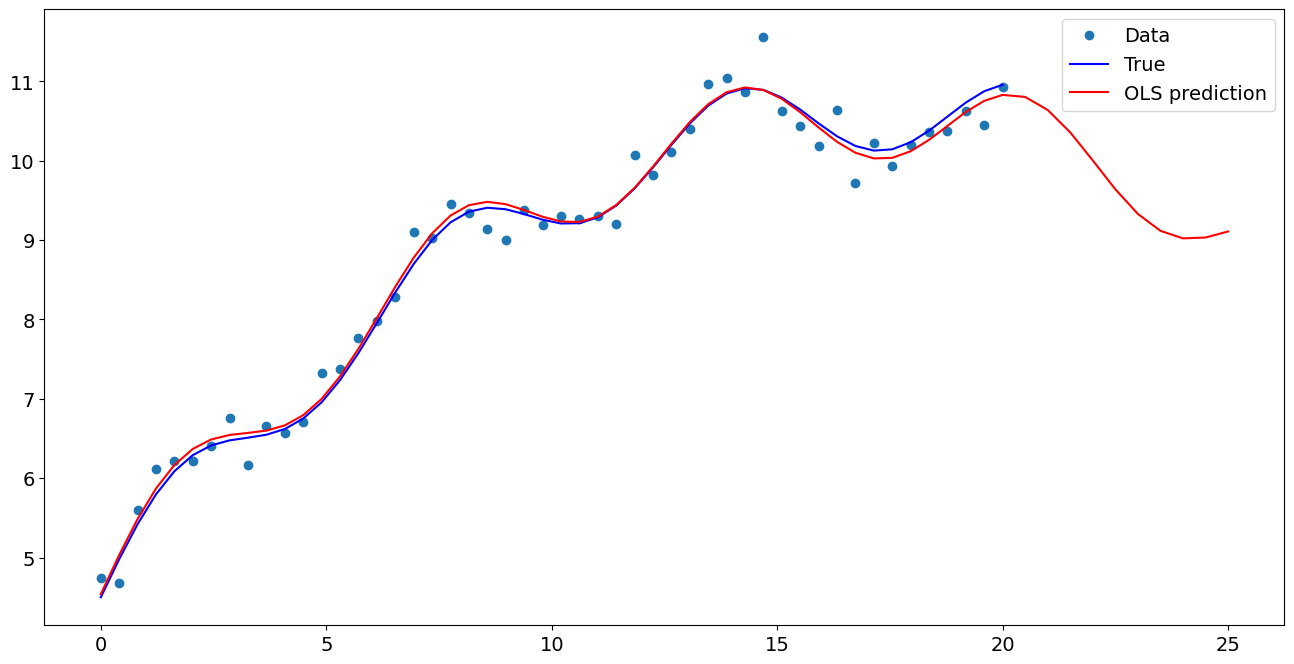

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.064428
x1                  0.500505
np.sin(x1)          0.524610
I((x1 - 5) ** 2)   -0.020998
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.803073
1    10.638585
2    10.356136
3    10.002610
4     9.639721
5     9.328909
6     9.116288
7     9.021365
8     9.032257
9     9.108607
dtype: float64